In [35]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

## a. Membaca dataset standar iris dan dataset play-tennis

### Dataset Standar Iris

In [5]:
iris = datasets.load_iris()
displayiris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
displayiris['target'] = iris['target']
displayiris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Dataset Play-Tennis

In [43]:
data = pd.read_csv("weather.nominal.csv")
data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### c. Melakukan pembelajaran NaïveBayes, DecisionTree, kNN, dan MLP untuk dataset iris dengan skema split train 90% dan test 10%, dan menampilkan kinerja serta confusion matrixnya.


In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

# X -> features, y -> label 
X = iris.data 
y = iris.target
class_names = iris.target_names
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#### 1. NaïveBayes

Accuracy :  0.9333333333333333 

Confusion matrix, without normalization
[[3 0 0]
 [0 8 0]
 [0 1 3]]


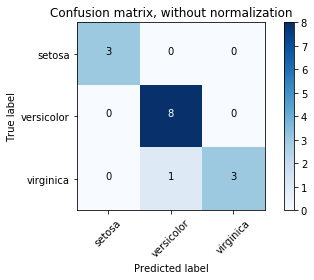

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.25 0.75]]


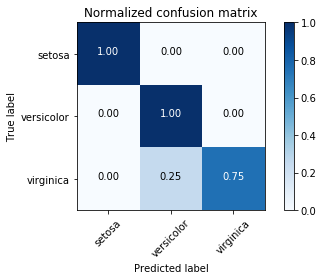

In [23]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print('Accuracy : ', accuracy, '\n') 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

#### 2. DecisionTree ID3

Accuracy :  0.9333333333333333 

Confusion matrix, without normalization
[[3 0 0]
 [0 8 0]
 [0 1 3]]


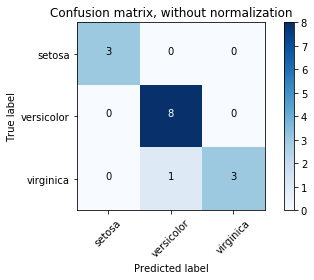

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.25 0.75]]


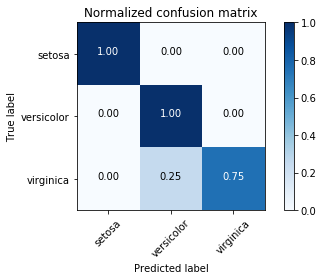

In [26]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

# accuracy on X_test 
accuracy = dtree_model.score(X_test, y_test) 
print('Accuracy : ', accuracy, '\n')
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

#### 3. kNN 

Accuracy :  1.0 

Confusion matrix, without normalization
[[3 0 0]
 [0 8 0]
 [0 0 4]]


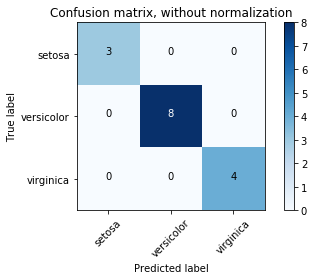

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


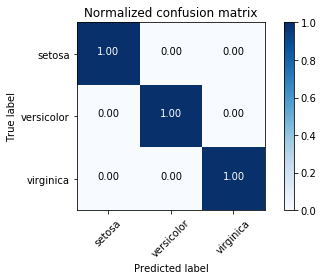

In [28]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print('Accuracy : ', accuracy, '\n')
  
# creating a confusion matrix   
cm = confusion_matrix(y_test, knn_predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Iteration 1, loss = 2.78857944
Iteration 2, loss = 1.20687747
Iteration 3, loss = 1.13792595
Iteration 4, loss = 1.13829086
Iteration 5, loss = 1.11086812
Iteration 6, loss = 1.10931461
Iteration 7, loss = 1.10733143
Iteration 8, loss = 1.10612131
Iteration 9, loss = 1.10491496
Iteration 10, loss = 1.10345588
Iteration 11, loss = 1.10160396
Iteration 12, loss = 1.09902929
Iteration 13, loss = 1.09516497
Iteration 14, loss = 1.09019405
Iteration 15, loss = 1.08616032
Iteration 16, loss = 1.08096229
Iteration 17, loss = 1.07241605
Iteration 18, loss = 1.05711326
Iteration 19, loss = 1.02676458
Iteration 20, loss = 0.96595024
Iteration 21, loss = 0.92016655
Iteration 22, loss = 1.00143325
Iteration 23, loss = 1.13785315
Iteration 24, loss = 1.13802793
Iteration 25, loss = 1.13600153
Iteration 26, loss = 1.13231707
Iteration 27, loss = 1.12758365
Iteration 28, loss = 1.12237716
Iteration 29, loss = 1.11718495
Iteration 30, loss = 1.11238241
Iteration 31, loss = 1.10822948
Iteration 32, los

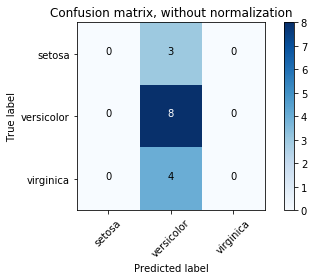

Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


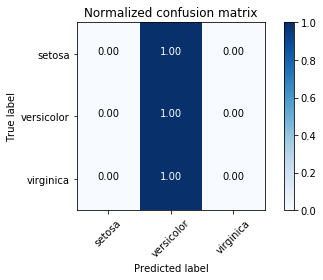

In [33]:
# training a MLP classifier 
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=0,
                    learning_rate_init=.1).fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)

# accuracy on X_test 
accuracy = mlp.score(X_test, y_test) 
print('\nAccuracy : ', accuracy, '\n')
  
# creating a confusion matrix   
cm = confusion_matrix(y_test, mlp_predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### g. Membuat instance baru dengan memberi nilai untuk setiap atribut

In [37]:
new_instance = [6.7, 2.5, 5.7, 1.8]

### h. Melakukan klasifikasi dengan memanfaatkan model/hipotesis NaïveBayes, DecisionTree, dan kNN dan instance pada g.